#                  TUGAS 1 BENGKEL KODING                   


Nama  : Dive Oktabid fikhri

Nim   : A11.2022.14202

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [21]:
# Load dataset
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
             'hours_per_week', 'native_country', 'income']

In [22]:
df = pd.read_csv('/content/drive/MyDrive/bengkod/adult.csv', names=col_names, na_values=" ?")

df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
# Explor Data (EDA)
print("\nInfo Dataset:\n")
df.info()

print("\nCek Missing Values:\n")
print(df.isnull().sum())

print("\nDeskripsi Statistik:\n")
print(df.describe())


Info Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Cek Missing Values:

age                  0
workclass         1836
fnlwgt   

<Figure size 1200x800 with 0 Axes>

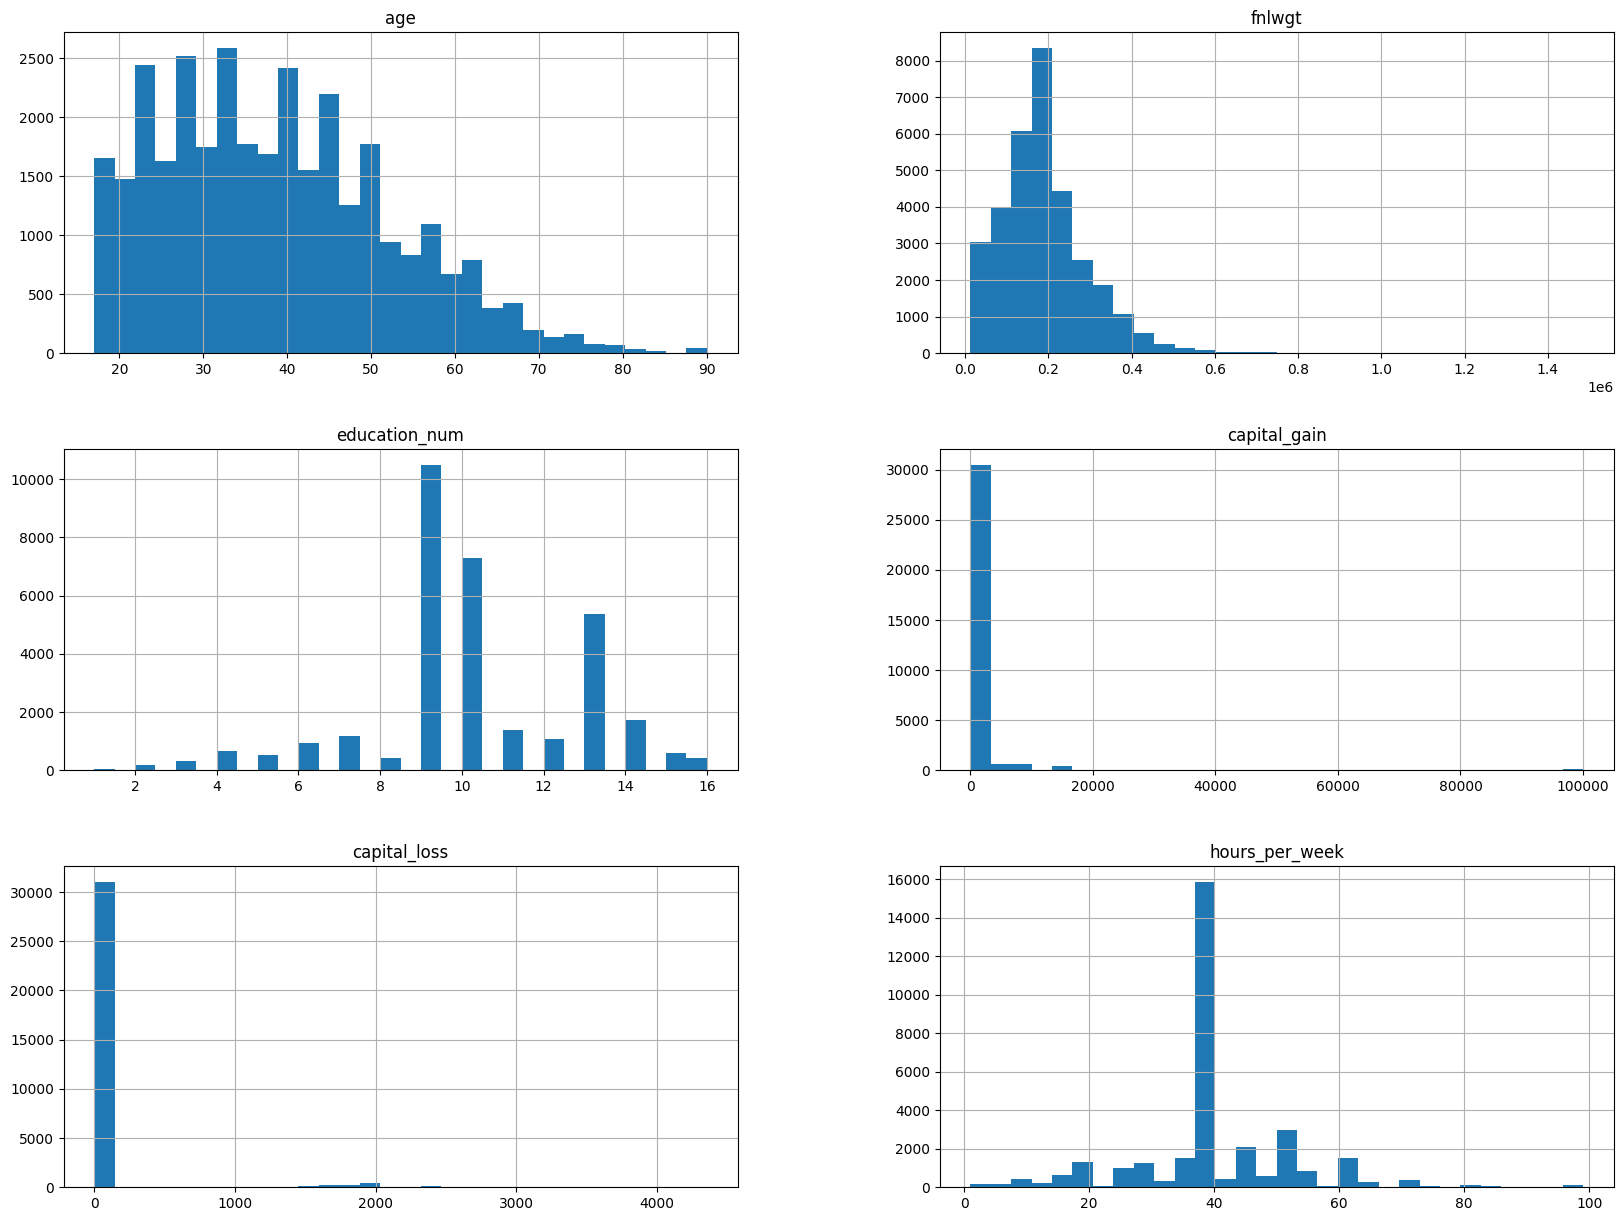

In [24]:
# Visualisasi distribusi kolom numerik
# Membuat histogram untuk melihat distribusi setiap kolom numerik.
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(20, 15))
plt.show()


In [25]:
# Handling Missing Values
print("\nSebelum menghapus missing values:\n", df.shape)
df.dropna(inplace=True)
print("Setelah menghapus missing values:\n", df.shape)


Sebelum menghapus missing values:
 (32561, 15)
Setelah menghapus missing values:
 (30162, 15)


In [10]:
# Encoding data kategori menjadi numerik
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [11]:
# Pemisahan fitur dan target
X = df.drop(['income'], axis=1)
y = df['income']

In [12]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Prediksi
y_pred = model.predict(X_test)

In [26]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi Model: {:.2f}%".format(accuracy * 100))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi Model: 80.89%

Confusion Matrix:
[[3930  573]
 [ 580  950]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4503
           1       0.62      0.62      0.62      1530

    accuracy                           0.81      6033
   macro avg       0.75      0.75      0.75      6033
weighted avg       0.81      0.81      0.81      6033



In [19]:
# Mengcek model apakah overfitting atau tidak

# Evaluasi akurasi pada data training
y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print("\nAkurasi pada Data Training: {:.2f}%".format(training_accuracy * 100))

# Evaluasi akurasi pada data testing (sudah ada di kode sebelumnya)
testing_accuracy = accuracy_score(y_test, y_pred)
print("Akurasi pada Data Testing: {:.2f}%".format(testing_accuracy * 100))



Akurasi pada Data Training: 100.00%
Akurasi pada Data Testing: 80.89%


Model mengalami Overfitting

Akurasi pada Data Training (100.00%) terlalu sempurna, artinya model menghafal data training dengan sangat baik.

Akurasi pada Data Testing (80.89%) jauh lebih rendah, menunjukkan bahwa model kesulitan menggeneralisasi pola dari data baru yang belum pernah dilihat.

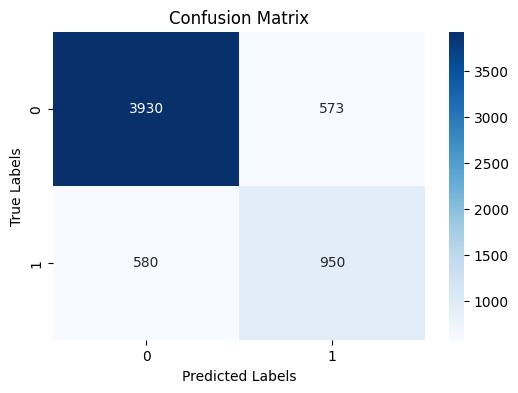

In [17]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**Deskripsi Singkat Hasil Analisis**

saya menggunakan model Decision Tree Classifier untuk memprediksi apakah seseorang memiliki pendapatan lebih dari atau kurang dari $50K per tahun. Dataset diolah dengan menghapus nilai kosong () dan mengonversi data kategori menjadi numerik menggunakan Label Encoding.

Setelah data diproses, model dilatih menggunakan Training Set (80%) dan diuji dengan Testing Set (20%). Hasil akurasi yang dicapai oleh model adalah sekitar 80.89%. Confusion Matrix menunjukkan bahwa sebagian besar prediksi berhasil diklasifikasikan dengan benar.

Meskipun model Decision Tree ini sudah memberikan hasil yang cukup baik, akurasi dapat ditingkatkan lagi dengan Hyperparameter Tuning atau penggunaan model yang lebih kompleks seperti Random Forest, atau normalisasi data. Teknik ini dapat membantu mengurangi overfitting dan memastikan setiap fitur memiliki skala yang sama.